# DESCRIPTION

## Problem Statement

Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, who try to trick the system. Correctly identifying fraudulent transactions is often compared with finding needle in a haystack because of the low event rate. 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that the customers are not charged for items that they did not purchase.
You are required to try various techniques such as supervised models with oversampling, unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.
Dataset Snapshot

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset represents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. 

Features V1, V2, ... V28 are the principal components obtained with PCA. 
The only features which have not been transformed with PCA are 'Time' and 'Amount'

 

### Project Task: Week 1

* Exploratory Data Analysis (EDA):

1. Perform an EDA on the Dataset.

    a. Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation

    b. Find if there is any connection between Time, Amount, and the transaction being fraudulent.

2. Check the class count for each class. It’s a class Imbalance problem.

3. Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.

    a. Oversampling or undersampling can be used to tackle the class imbalance problem

    b. Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times.

4. Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

### Project Task: Week 2

Modeling Techniques:

Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
Use different Tree-based classifiers like Random Forest and XGBoost. 

a. Remember Tree-based classifiers work on two ideologies: Bagging or Boosting

b. Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost.

Compare the results of 1 with 2 and check if there is any incremental gain.

### Project Task: Week 3

Applying ANN:

1. Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.

    a. Fine-tune number of layers

    b. Number of Neurons in each layers

    c. Experiment in batch-size

    d. Experiment with number of epochs. Check the observations in loss and accuracy

    e. Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop

    f. Find out which activation performs best for this use case and why?

    g. Check Confusion Matrix, Precision, Recall and F1-Score

2. Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above. 

3. Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

Anomaly Detection:

4. Implement anomaly detection algorithms.

    a. Assume that the data is coming from a single or a combination of multivariate Gaussian

    b. Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in a)

### Project Task: Week 4

Inference and Observations:

Visualize the scores for Fraudulent and Non-Fraudulent transactions.
Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not?
Be as creative as possible in finding other interesting insights.

# Importing libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
%matplotlib inline

In [137]:
plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")

In [138]:
pd.options.display.max_columns = None

# Loading Dataset

In [139]:
from google.colab import drive
drive.mount("./gdrive")

Drive already mounted at ./gdrive; to attempt to forcibly remount, call drive.mount("./gdrive", force_remount=True).


In [140]:
path_train = "./gdrive/MyDrive/datasets/Financial/train_data.csv"

In [169]:
df = pd.read_csv(path_train)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,-0.572665,0.346009,-0.047407,-0.098964,-0.663284,0.181411,-0.124345,-0.790453,-0.720944,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,1.281502,-1.430087,0.372028,1.403024,-2.739413,-1.331766,1.964590,-0.205639,1.325588,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,-1.016020,-0.654945,-1.473470,0.317345,1.067491,-0.372642,-0.674725,0.369841,0.095583,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,0.882673,0.547890,0.269484,-1.253302,-0.883963,0.495221,-0.153212,0.296710,0.136148,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,1.136666,0.273476,0.697123,-1.222134,-0.938820,1.298149,0.912921,-0.793721,1.064984,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [171]:
df.drop(columns=["Time", "Class"]).agg(["mean", "std", "median"]).T

,mean,std,median
V1,-0.003321,1.963028,0.012663
V2,-0.001652,1.661178,0.066665
V3,0.001066,1.516107,0.182170
V4,-0.000374,1.415061,-0.019309
V5,0.000877,1.367074,-0.055243
V6,0.000770,1.325341,-0.273025
V7,-0.000035,1.220384,0.040409
V8,0.001625,1.192648,0.022928
V9,-0.000391,1.097367,-0.050932
V10,-0.000794,1.087268,-0.092068


In [172]:
df["Class"].value_counts()

0    227451
1       394
Name: Class, dtype: int64

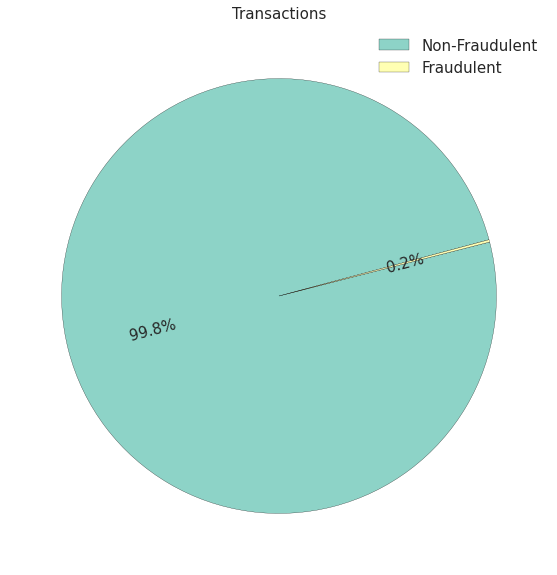

In [173]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap("Set3")

ax.pie(
    x=df["Class"].value_counts(),
    autopct="%.1f%%",
    startangle=15,
    colors=[cmap(i) for i in range(100)],
    wedgeprops={"linewidth": 0.25, "edgecolor": "k"}, 
    textprops={"fontsize": 15, "rotation": 15})

ax.legend(["Non-Fraudulent", "Fraudulent"], 
          loc='best', 
          fontsize=15,
          frameon=False)
          
ax.set_title("Transactions", loc="center", fontdict={"fontsize": 15})


plt.show()

In [174]:
df["Amount"].agg(["max", "min"])

max    19656.53
min        0.00
Name: Amount, dtype: float64

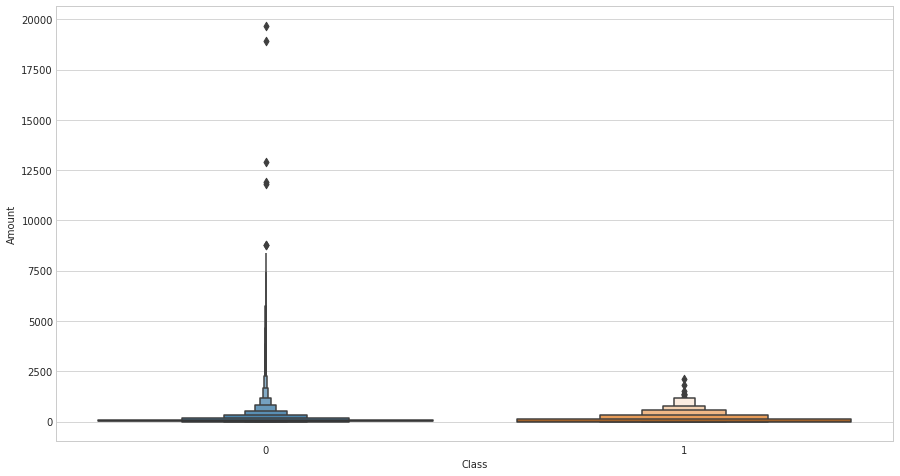

In [175]:
plt.figure(figsize=(15, 8))
sns.boxenplot(data=df, x="Class", y="Amount")

In [176]:
df["Amount_Bins"] = pd.cut(df["Amount"], 
       bins=[0, 1000, 5000, 10_000, 15_000, 20_000, 25_000],
       labels=[0, 1, 2, 3, 4, 5],
       include_lowest=False,
       right=False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Bins
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,-0.572665,0.346009,-0.047407,-0.098964,-0.663284,0.181411,-0.124345,-0.790453,-0.720944,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,1.281502,-1.430087,0.372028,1.403024,-2.739413,-1.331766,1.964590,-0.205639,1.325588,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,-1.016020,-0.654945,-1.473470,0.317345,1.067491,-0.372642,-0.674725,0.369841,0.095583,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,0.882673,0.547890,0.269484,-1.253302,-0.883963,0.495221,-0.153212,0.296710,0.136148,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,1.136666,0.273476,0.697123,-1.222134,-0.938820,1.298149,0.912921,-0.793721,1.064984,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0,0


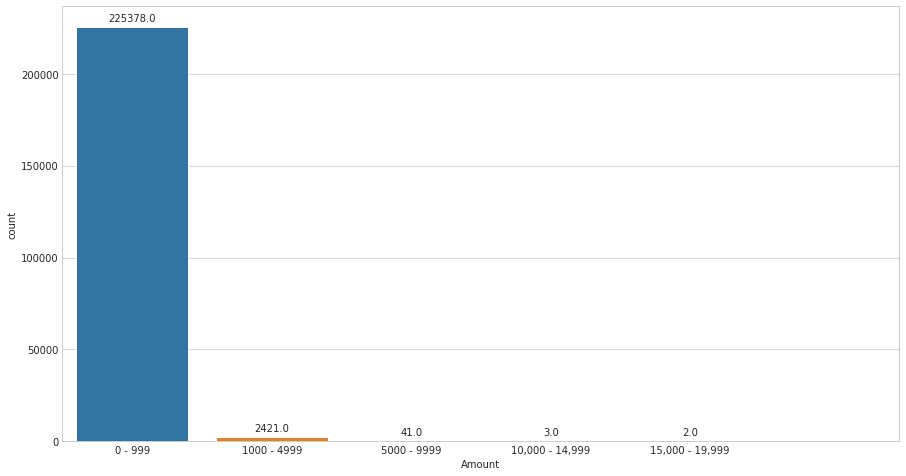

In [177]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=df,x="Amount_Bins", ax=ax)

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()

    ax.annotate(f"{height}", 
                (x + width / 2.0, height), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
    
    ax.set_xticklabels(["0 - 999", "1000 - 4999", "5000 - 9999", "10,000 - 14,999", "15,000 - 19,999"])
    ax.set_xlabel("Amount")

In [178]:
df["Time"] = pd.to_datetime(df["Time"], origin="2013-01-01", unit="s")
df["Hour"] = df["Time"].dt.hour
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Bins,Hour
0,2013-01-01 10:39:15,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,-0.572665,0.346009,-0.047407,-0.098964,-0.663284,0.181411,-0.124345,-0.790453,-0.720944,-0.084556,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0,0,10
1,2013-01-01 06:15:55,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,1.281502,-1.430087,0.372028,1.403024,-2.739413,-1.331766,1.964590,-0.205639,1.325588,-0.373759,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0,0,6
2,2013-01-01 00:40:31,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,-1.016020,-0.654945,-1.473470,0.317345,1.067491,-0.372642,-0.674725,0.369841,0.095583,-0.039868,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0,0,0
3,2013-01-02 00:06:13,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,0.882673,0.547890,0.269484,-1.253302,-0.883963,0.495221,-0.153212,0.296710,0.136148,0.382305,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0,0,0
4,2013-01-02 11:20:02,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,1.136666,0.273476,0.697123,-1.222134,-0.938820,1.298149,0.912921,-0.793721,1.064984,0.106592,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0,0,11


In [179]:
by_hour = df.groupby(by=[df["Time"].dt.hour, "Class"])["Amount"].agg(["sum", "size"]).unstack(level="Class")
by_hour.columns =["Amount_Non-Fraudulent", "Amount_Fraudulent", "Num_Non-Fraudulent", "Num_Fraudulent"]
by_hour.head()

,Amount_Non-Fraudulent,Amount_Fraudulent,Num_Non-Fraudulent,Num_Fraudulent
Time,,,,
0,368453.64,1820.07,6227,5
1,205626.42,1219.32,3362,8
2,191478.63,3948.21,2647,45
3,147033.85,230.91,2813,13
4,136486.36,1396.40,1756,20


Text(0, 0.5, 'Amount')

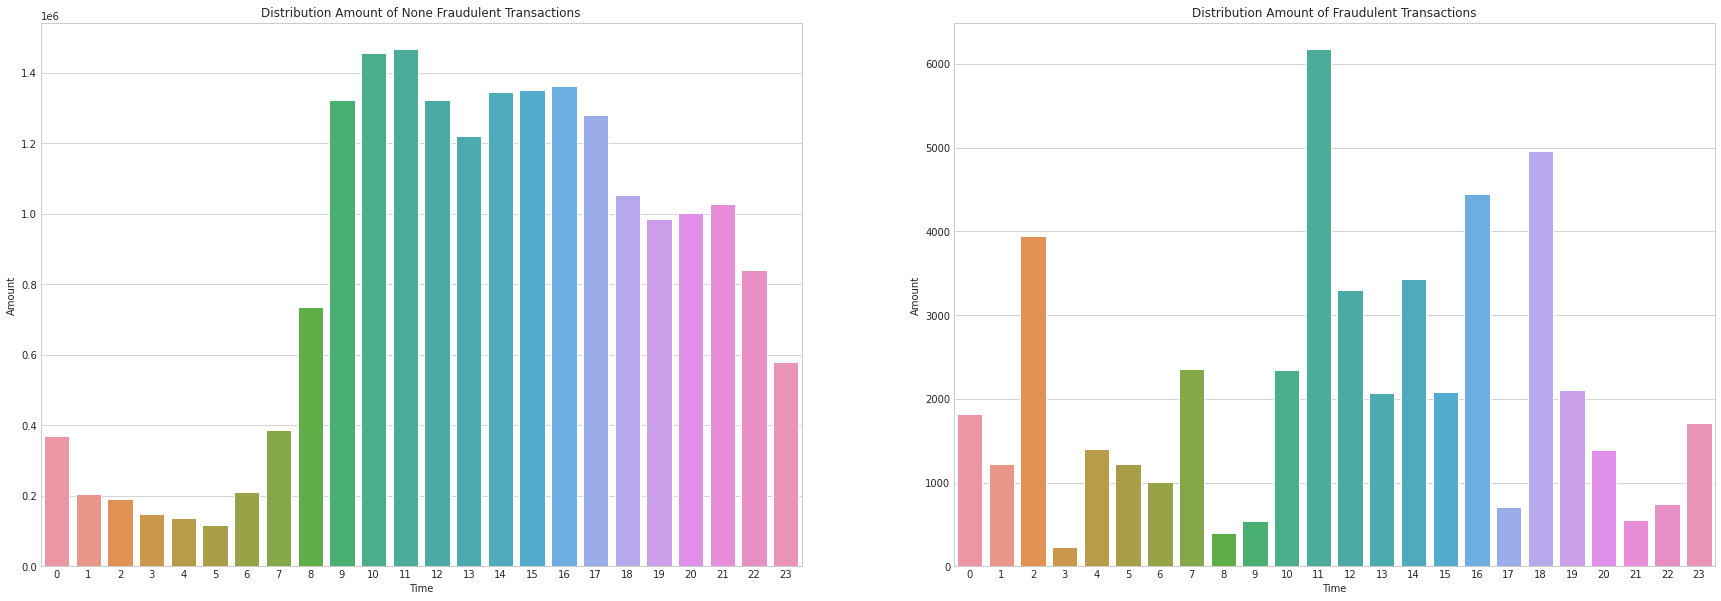

In [180]:
fig, ax = plt.subplots(figsize=(30, 10), ncols=2)
sns.barplot(x=by_hour.index, y=by_hour["Amount_Non-Fraudulent"], ax=ax[0])
ax[0].set_title("Distribution Amount of None Fraudulent Transactions")
ax[0].set_ylabel("Amount")

sns.barplot(x=by_hour.index, y=by_hour["Amount_Fraudulent"], ax=ax[1])
ax[1].set_title("Distribution Amount of Fraudulent Transactions")
ax[1].set_ylabel("Amount")

Text(0, 0.5, 'Count')

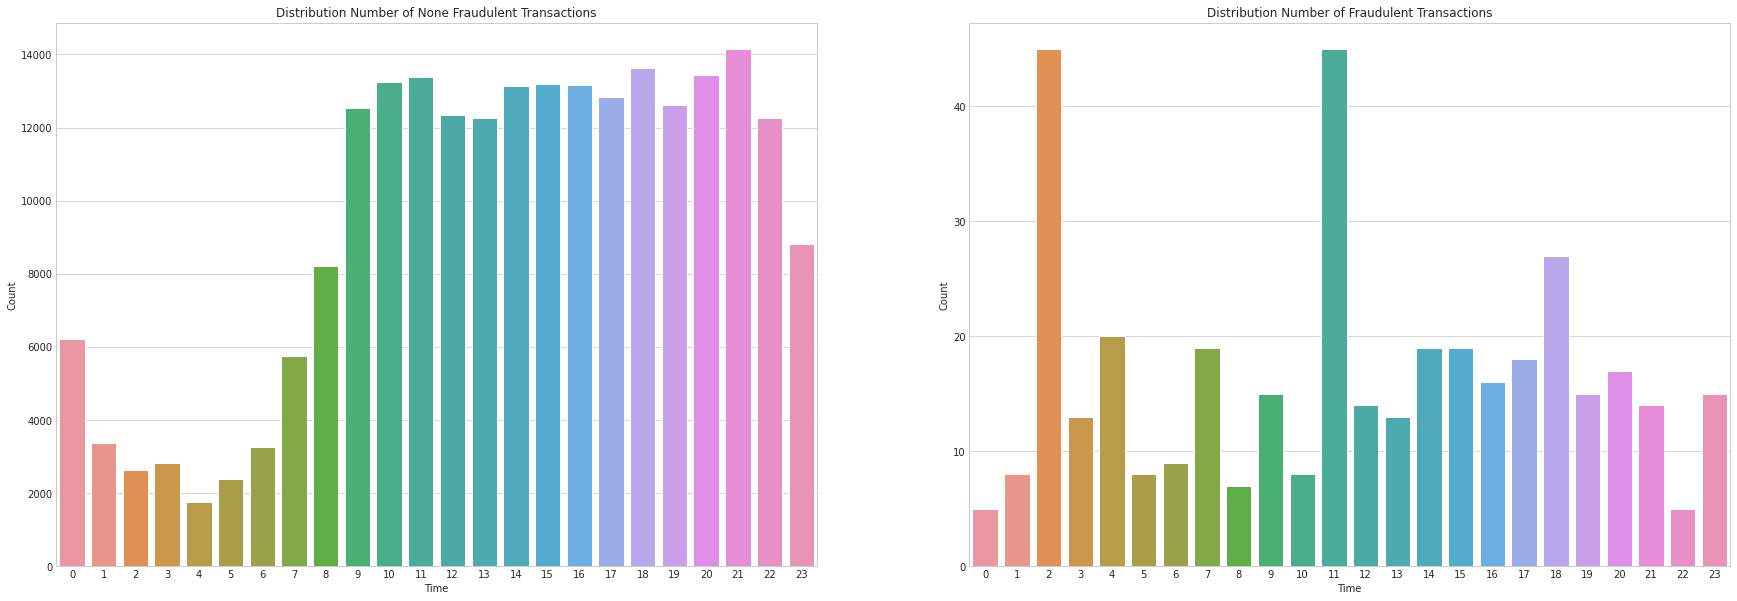

In [181]:
fig, ax = plt.subplots(figsize=(30, 10), ncols=2)
sns.barplot(x=by_hour.index, y=by_hour["Num_Non-Fraudulent"], ax=ax[0])
ax[0].set_title("Distribution Number of None Fraudulent Transactions")
ax[0].set_ylabel("Count")

sns.barplot(x=by_hour.index, y=by_hour["Num_Fraudulent"], ax=ax[1])
ax[1].set_title("Distribution Number of Fraudulent Transactions")
ax[1].set_ylabel("Count")

In [182]:
X = df.drop(columns=["Class", "Time", "Amount"]).values
y = df["Class"].values

In [185]:
def sample(X, y, sampler):

    sampler = sampler()

    X_under, y_under = sampler.fit_resample(X, y)

    return X_under, y_under

In [186]:
from imblearn.under_sampling import NearMiss

In [195]:
X_under, y_under = sample(X, y, NearMiss)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [196]:
X_under.shape, y_under.shape, X.shape, y.shape

((788, 30), (788,), (227845, 30), (227845,))

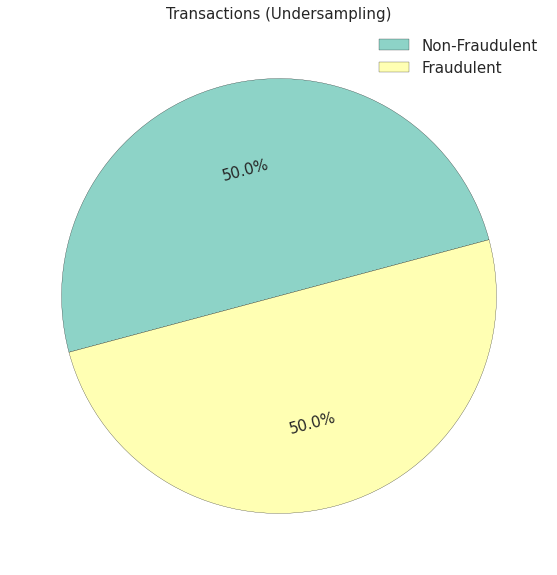

In [197]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap("Set3")

value, count = np.unique(y_under, return_counts=True)

ax.pie(
    x=count,
    autopct="%.1f%%",
    startangle=15,
    colors=[cmap(i) for i in range(100)],
    wedgeprops={"linewidth": 0.25, "edgecolor": "k"}, 
    textprops={"fontsize": 15, "rotation": 15})

ax.legend(["Non-Fraudulent", "Fraudulent"], 
          loc='best', 
          fontsize=15,
          frameon=False)
          
ax.set_title("Transactions (Undersampling)", loc="center", fontdict={"fontsize": 15})


plt.show()

In [194]:
from imblearn.over_sampling import BorderlineSMOTE

In [198]:
X_over, y_over = sample(X, y, BorderlineSMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [199]:
X_over.shape, y_over.shape, X.shape, y.shape

((454902, 30), (454902,), (227845, 30), (227845,))

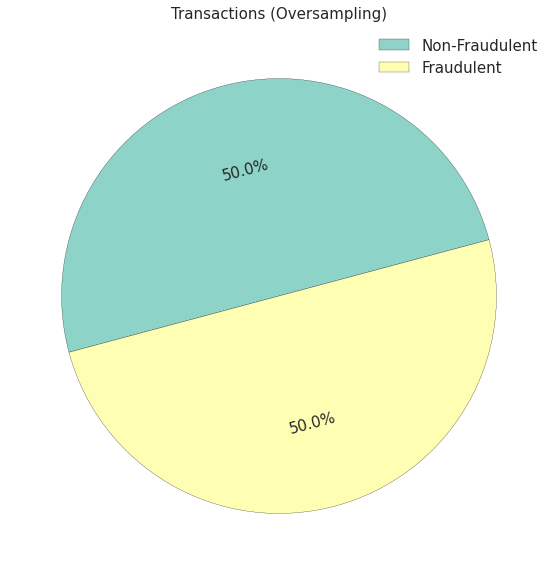

In [200]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.get_cmap("Set3")

value, count = np.unique(y_under, return_counts=True)

ax.pie(
    x=count,
    autopct="%.1f%%",
    startangle=15,
    colors=[cmap(i) for i in range(100)],
    wedgeprops={"linewidth": 0.25, "edgecolor": "k"}, 
    textprops={"fontsize": 15, "rotation": 15})

ax.legend(["Non-Fraudulent", "Fraudulent"], 
          loc='best', 
          fontsize=15,
          frameon=False)
          
ax.set_title("Transactions (Oversampling)", loc="center", fontdict={"fontsize": 15})


plt.show()

In [201]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [242]:
def compute_scores(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    scores = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall/sensitivity": recall_score(y_true, y_pred),
        "specificity": tn / (tn+fp),
        "F1": f1_score(y_true, y_pred) 
    }

    for k, v in scores.items():
        print(f"{k:<25}: {v:.3}")
    
    print()

    plt.figure(figsize=(10, 10))

    cnf_mtx = confusion_matrix(y_true, y_pred)

    sns.heatmap(data=cnf_mtx / np.sum(cnf_mtx),
                annot=True,
                fmt=".2%",
                cmap="Blues",
                cbar=False, 
                xticklabels=["Non-Fraudulent", "Fraudulent"],
                yticklabels=["Non-Fraudulent", "Fraudulent"])

    plt.xlabel("Predicted", {"fontsize": 20})
    plt.ylabel("True", {"fontsize": 20})

In [243]:
from sklearn.naive_bayes import GaussianNB

In [244]:
def naive_bayes_model(X, y):

    # Gaussian Naive Bayes

    print("Gaussian Naive Bayes Model:\n")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    model = GaussianNB()
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)

    compute_scores(y_test, y_pred)

Gaussian Naive Bayes Model:

accuracy                 : 0.947
precision                : 0.963
recall/sensitivity       : 0.93
specificity              : 0.964
F1                       : 0.946



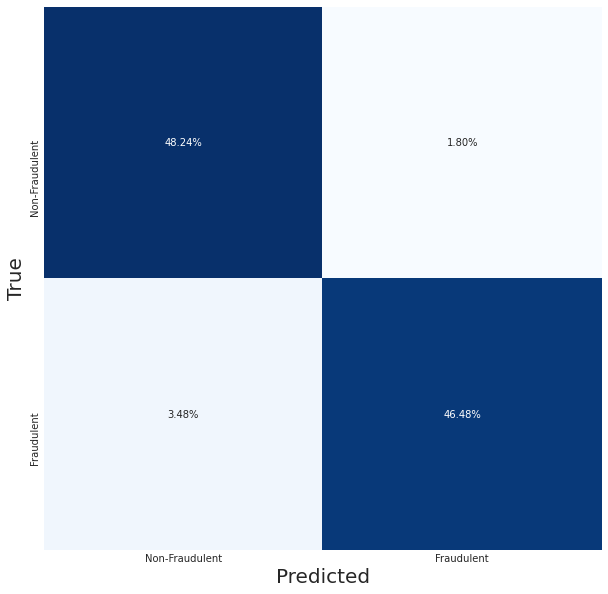

In [245]:
naive_bayes_model(X_over, y_over)

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
def logistic_regression_model(X, y):

    # Logistic Regression

    print("Logistic Regression Model:\n")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)

    compute_scores(y_test, y_pred)

Logistic Regression Model:

accuracy                 : 0.998
precision                : 0.996
recall/sensitivity       : 1.0
specificity              : 0.996
F1                       : 0.998



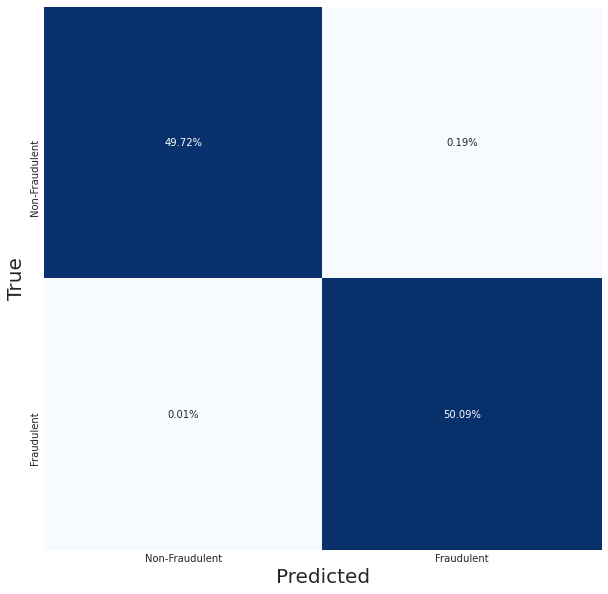

In [248]:
logistic_regression_model(X_over, y_over)

In [249]:
from sklearn.svm import SVC

In [250]:
def svc_model(X, y):

    # SVC

    print("SVC Model:\n")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    model = SVC()
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)

    compute_scores(y_test, y_pred)

SVC Model:

accuracy                 : 0.999
precision                : 0.998
recall/sensitivity       : 1.0
specificity              : 0.998
F1                       : 0.999



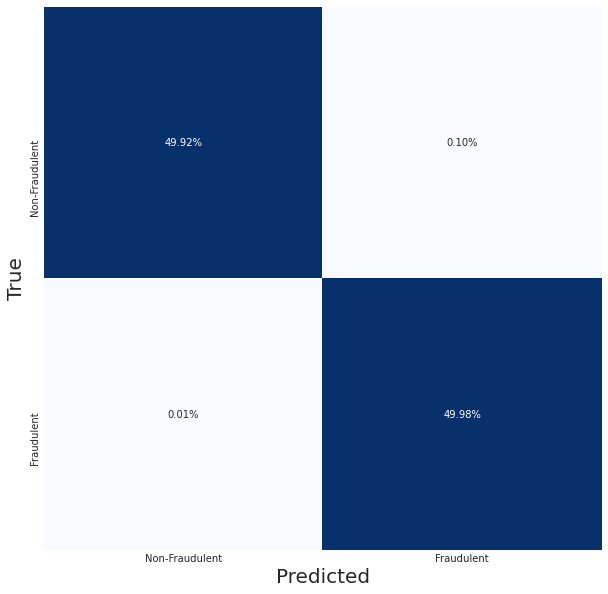

In [251]:
svc_model(X_over, y_over)

In [252]:
import xgboost as xgb

In [253]:
def xgboost_model(X, y):

    # SVC

    print("XGBoost Model:\n")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    compute_scores(y_test, predictions)

XGBoost Model:

accuracy                 : 0.999
precision                : 0.999
recall/sensitivity       : 1.0
specificity              : 0.999
F1                       : 0.999



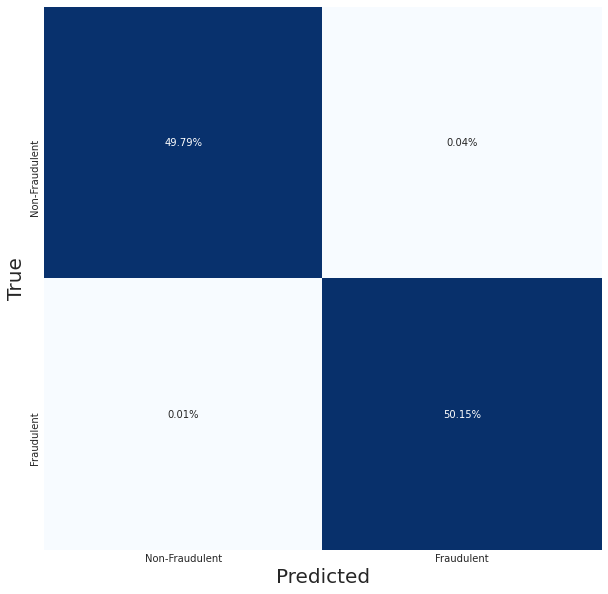

In [254]:
xgboost_model(X_over, y_over)

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
def random_forest_model(X, y):

    # Random Forest

    print("Random Forest Model:\n")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    compute_scores(y_test, y_pred)

Random Forest Model:

accuracy                 : 1.0
precision                : 1.0
recall/sensitivity       : 1.0
specificity              : 1.0
F1                       : 1.0



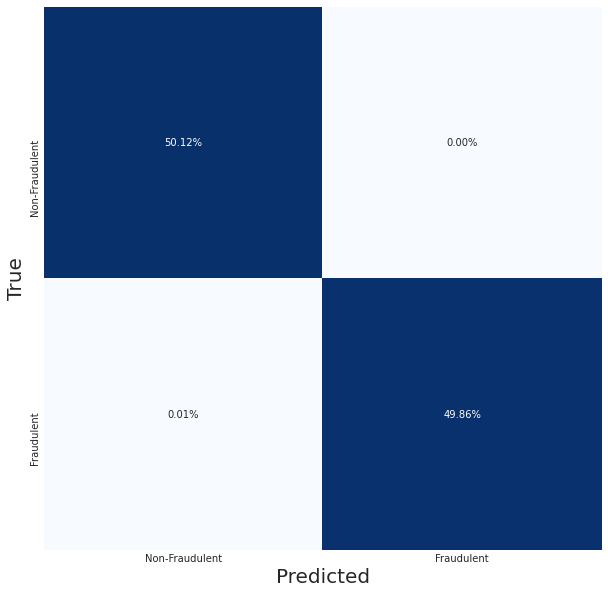

In [261]:
random_forest_model(X_over, y_over)

In [293]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Softmax, PReLU
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import AUC, Accuracy, Precision, Recall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives

In [274]:
def ann_model():

    model = Sequential()
    
    model.add(Dense(512, kernel_initializer='he_normal', input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(128, kernel_initializer='he_normal'))
    model.add(PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(256, kernel_initializer='he_normal'))
    model.add(PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(512, kernel_initializer='he_normal'))
    model.add(PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))

    model.add(Dense(1, kernel_initializer='normal', activation="sigmoid"))

    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=[AUC(name="auc"),
                           AUC(name='prc', curve='PR'),
                           Recall(name="recall"),
                           Precision(name="precision"),
                           Accuracy(name="accuracy"),
                           TruePositives(name="TP"),
                           TrueNegatives(name="TN"),
                           FalsePositives(name="FP"),
                           FalseNegatives(name="FN")]
                  )
    
    return model

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.33)

In [277]:
model = ann_model()
history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=100,
        verbose=2,
        validation_data=(X_test, y_test))

Epoch 1/50
3048/3048 - 70s - loss: 0.0098 - auc: 0.9995 - prc: 0.9992 - recall: 0.9983 - precision: 0.9976 - accuracy: 1.0827e-04 - TP: 151910.0000 - TN: 152240.0000 - FP: 370.0000 - FN: 264.0000 - val_loss: 0.0031 - val_auc: 0.9997 - val_prc: 0.9995 - val_recall: 0.9999 - val_precision: 0.9993 - val_accuracy: 5.9953e-05 - val_TP: 75267.0000 - val_TN: 74788.0000 - val_FP: 53.0000 - val_FN: 10.0000
Epoch 2/50
3048/3048 - 69s - loss: 0.0040 - auc: 0.9997 - prc: 0.9995 - recall: 0.9995 - precision: 0.9993 - accuracy: 4.7903e-04 - TP: 152098.0000 - TN: 152498.0000 - FP: 112.0000 - FN: 76.0000 - val_loss: 0.0022 - val_auc: 0.9998 - val_prc: 0.9997 - val_recall: 0.9999 - val_precision: 0.9995 - val_accuracy: 1.3323e-05 - val_TP: 75266.0000 - val_TN: 74800.0000 - val_FP: 41.0000 - val_FN: 11.0000
Epoch 3/50
3048/3048 - 65s - loss: 0.0033 - auc: 0.9997 - prc: 0.9996 - recall: 0.9995 - precision: 0.9994 - accuracy: 0.0028 - TP: 152102.0000 - TN: 152512.0000 - FP: 98.0000 - FN: 72.0000 - val_los

In [283]:
def get_sensitivity(tps, fns):
    # Sensitivity = (True Positive)/(True Positive + False Negative)
     return [tp / (tp + fn) for tp, fn in zip(tps, fns)]

def get_specificity(tns, fps):
    # Specificity = (True Negative)/(True Negative + False Positive)
    return [tn / (tn + fp) for tn, fp in zip(tns, fps)]

def get_f1_score(tps, fps, fns):

    return[tp / (tp + 0.5 * (fp + fn)) for tp, fp, fn in zip(tps, fps, fns)]

In [289]:
sensitivity = get_sensitivity(history.history["TP"], history.history["FN"])
val_sensitivity = get_sensitivity(history.history["val_TP"], history.history["val_FN"])

specificity = get_specificity(history.history["TN"], history.history["FP"])
val_specificity = get_specificity(history.history["val_TN"], history.history["val_FP"])

f1 = get_f1_score(history.history["TP"], history.history["FP"], history.history["FN"])
val_f1 = get_f1_score(history.history["val_TP"], history.history["val_FP"], history.history["val_FN"])

In [290]:
metrics = {
    "loss": [history.history["loss"], history.history["val_loss"]],
    "auc": [history.history["auc"], history.history["val_auc"]],
    "prc": [history.history["prc"], history.history["val_prc"]],
    "recall": [history.history["recall"], history.history["val_recall"]],
    "precision": [history.history["precision"], history.history["val_precision"]],
    "accuracy": [history.history["accuracy"], history.history["val_accuracy"]],
    "sensitivity": [sensitivity, val_sensitivity],
    "specificity": [specificity, val_specificity],
    "F1": [f1, val_f1]
}

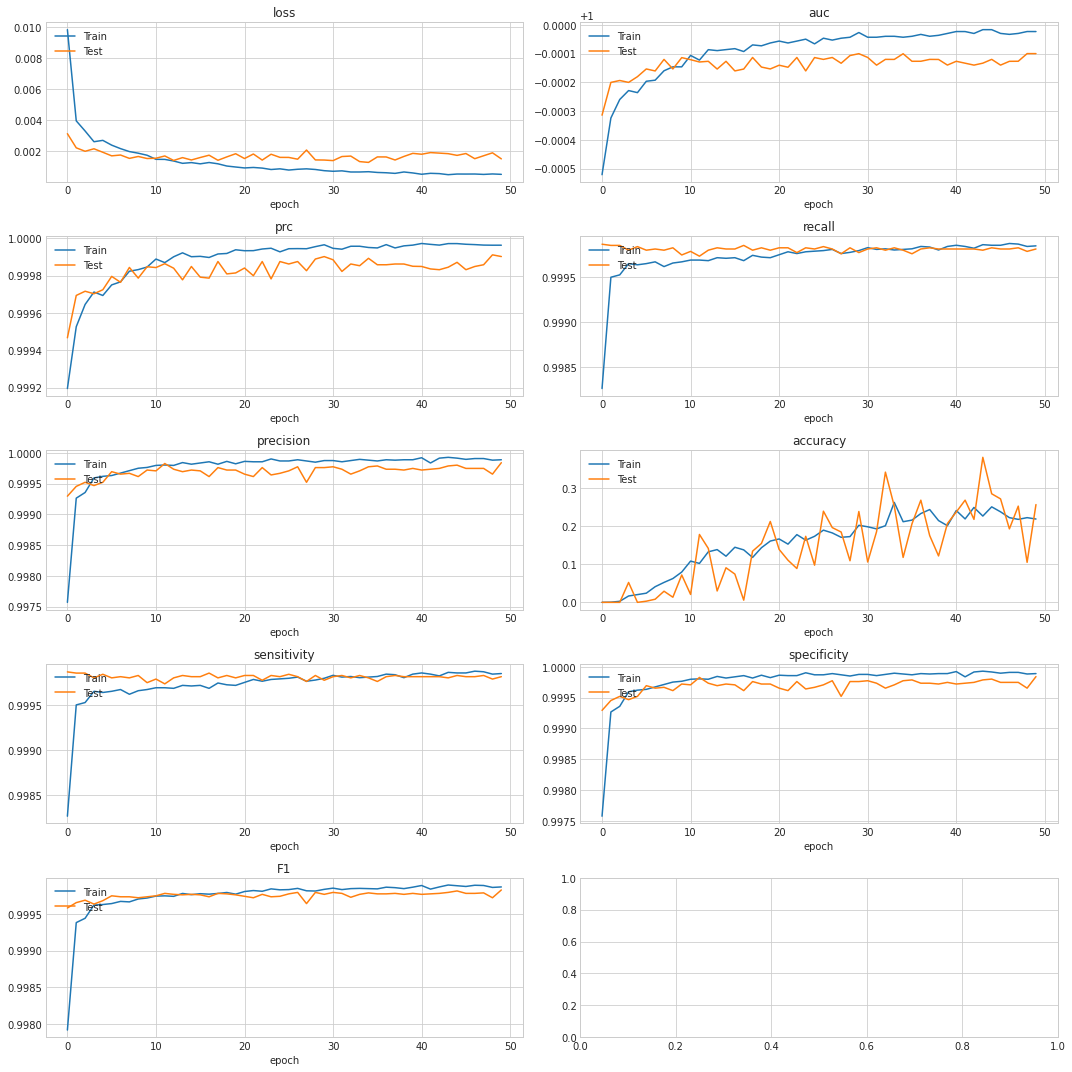

In [291]:
fig, axs = plt.subplots(figsize=(15, 15), ncols=2, nrows=5)

for metric, ax in zip(metrics.items(), axs.flatten()):
    name = metric[0]

    train = metric[1][0]
    test = metric[1][1]

    ax.plot(train)
    ax.plot(test)

    ax.set_title(name)

    ax.set_xlabel("epoch")
    ax.legend(['Train', 'Test'], loc='upper left')

fig.tight_layout()
fig.show()

accuracy                 : 1.0
precision                : 0.955
recall/sensitivity       : 0.916
specificity              : 1.0
F1                       : 0.935



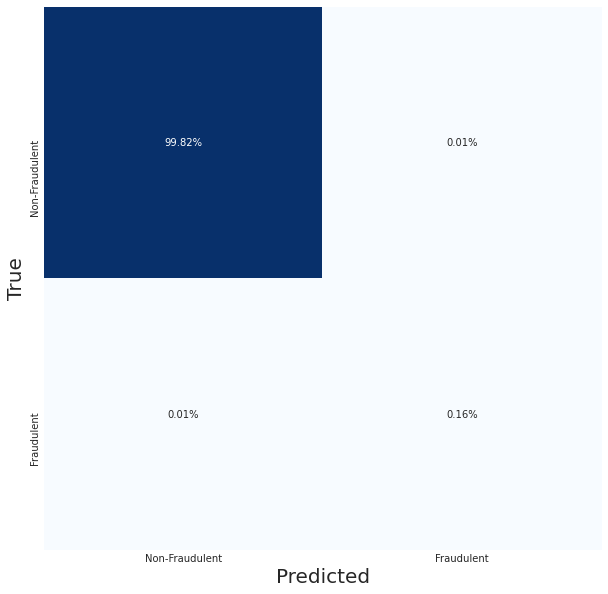

In [297]:
y_pred = model.predict(X)
compute_scores(y, np.round(y_pred))

In [324]:
from sklearn.ensemble import IsolationForest

In [403]:
forest = IsolationForest()
forest.fit(X)
scores = forest.decision_function(X)
y_pred = forest.predict(X)

In [406]:
y_pred = np.where(y_pred == -1, 1, 0)

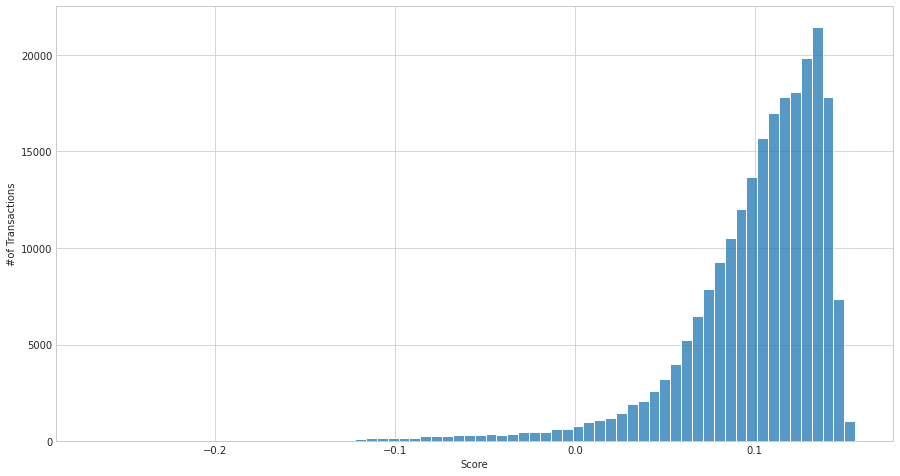

In [407]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.histplot(x=scores, bins=70, ax=ax)
ax.set_xlabel("Score")
ax.set_ylabel("#of Transactions")

fig.show()

In [399]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc

In [400]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):

    fig, ax = plt.subplots(figsize=(15, 20), nrows=2)

    precision, recall, thresholds = \
        precision_recall_curve(trueLabels, anomalyScores)

    average_precision = \
        average_precision_score(trueLabels, anomalyScores)



    ax[0].step(recall, precision, color='k', alpha=0.7, where='post')
    ax[0].fill_between(recall, precision, step='post', alpha=0.3, color='k')

    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlim([0.0, 1.0])

    ax[0].set_title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(trueLabels, \
                                     anomalyScores)
    areaUnderROC = auc(fpr, tpr)

    ax[1].plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    ax[1].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    ax[1].legend(loc="lower right")

    fig.tight_layout()
    fig.show()

    if returnPreds==True:
        return preds

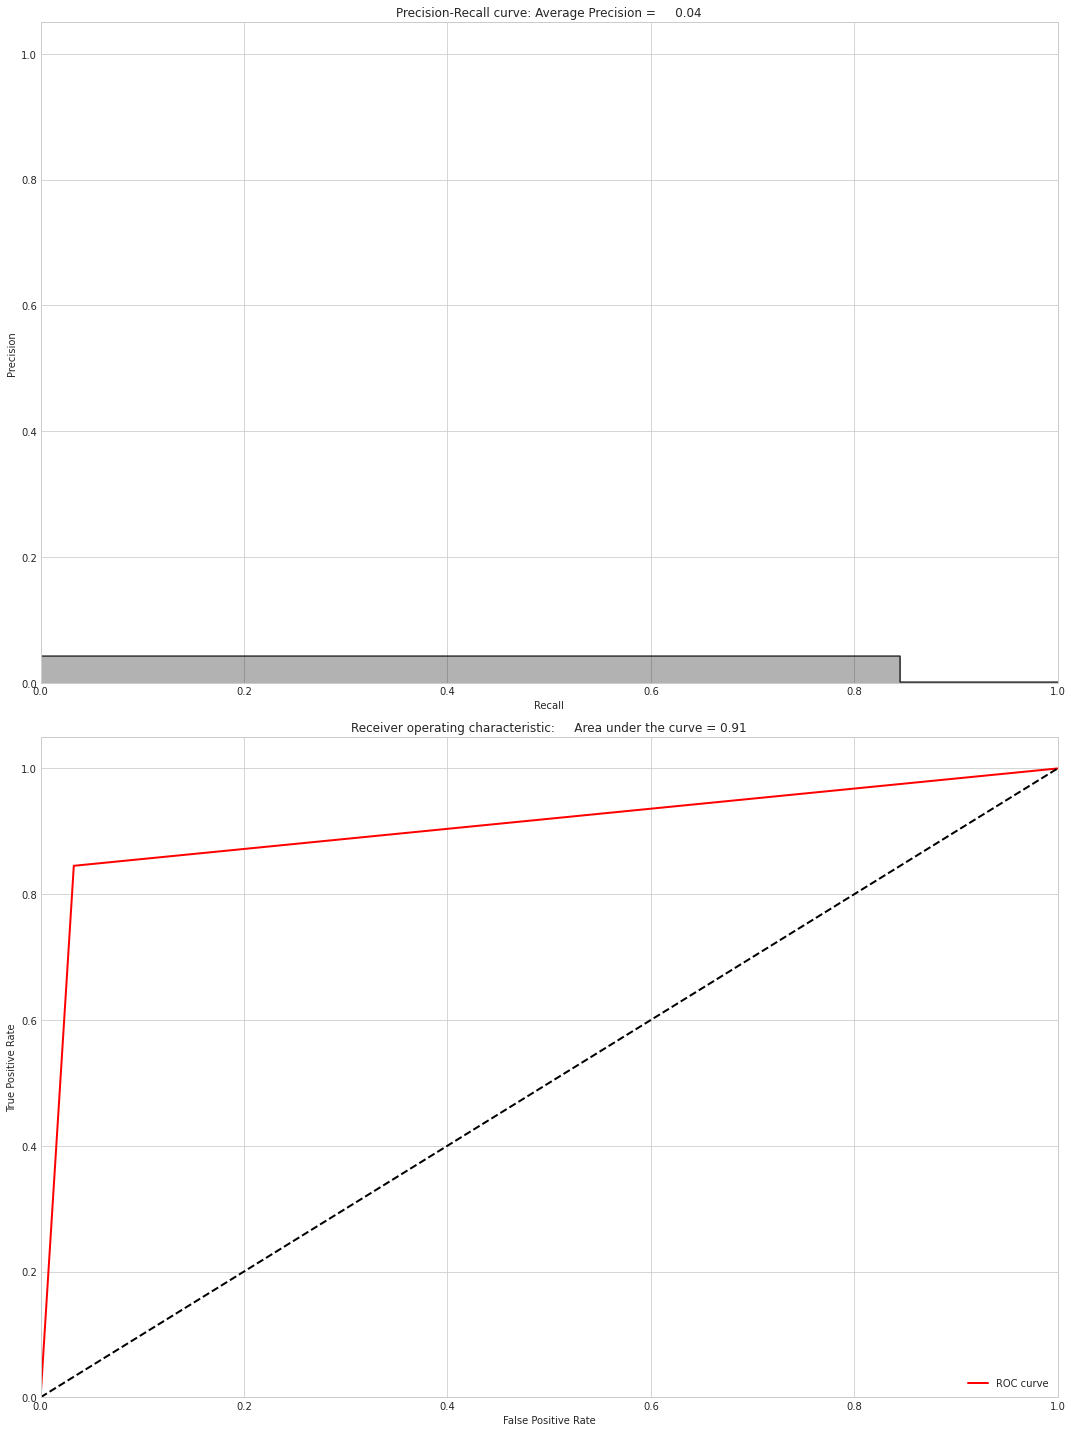

In [401]:
plotResults(y, y_pred)